In [1]:
from phimal_utilities.analysis import load_tensorboard

import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [2]:
df_deepmod = load_tensorboard('runs/deepmod_long/')
df_lstsq = load_tensorboard('runs/deepmod_lstsq_long/')
df_logprob= load_tensorboard('runs/deepmod_logprob_long_correct/')
df_lstsq_logprob = load_tensorboard('runs/deepmod_lstsq_logprob_long_correct/')

In [3]:
df_deepmod.keys()

Index(['Total_loss', 'MSE_0', 'Regression_0', 'L1_0', 'coeff_0_0', 'coeff_0_1',
       'coeff_0_2', 'coeff_0_3', 'coeff_0_4', 'coeff_0_5', 'coeff_0_6',
       'coeff_0_7', 'coeff_0_8', 'coeff_0_9', 'coeff_0_10', 'coeff_0_11',
       'scaled_coeff_0_0', 'scaled_coeff_0_1', 'scaled_coeff_0_2',
       'scaled_coeff_0_3', 'scaled_coeff_0_4', 'scaled_coeff_0_5',
       'scaled_coeff_0_6', 'scaled_coeff_0_7', 'scaled_coeff_0_8',
       'scaled_coeff_0_9', 'scaled_coeff_0_10', 'scaled_coeff_0_11',
       'mae_library_0', 'mae_library_1', 'mae_library_2', 'mae_library_3',
       'mae_library_4', 'mae_library_5', 'mae_library_6', 'mae_library_7',
       'mae_library_8', 'mae_library_9', 'mae_library_10', 'mae_library_11',
       'mae_time_deriv'],
      dtype='object')

# Costs

(0.0003, 0.0005)

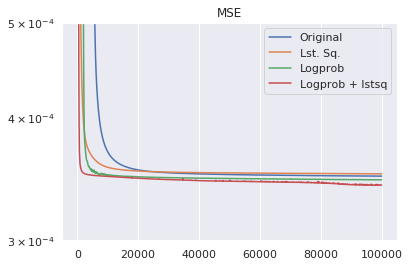

In [363]:
plt.semilogy(df_deepmod.index, df_deepmod['MSE_0'], label='Original')
plt.semilogy(df_lstsq.index, df_lstsq['MSE_0'], label='Lst. Sq.')
plt.semilogy(df_logprob.index, df_logprob['MSE_0'], label='Logprob')
plt.semilogy(df_lstsq_logprob.index, df_lstsq_logprob['MSE_0'], label='Logprob + lstsq')

plt.legend()
plt.title('MSE')
plt.ylim([3e-4, 5e-4])

Text(0.5, 1.0, 'Regression')

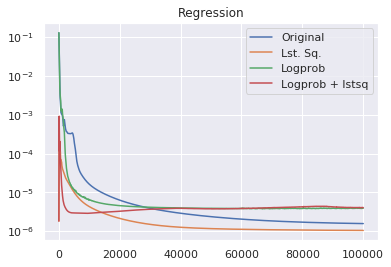

In [364]:
plt.semilogy(df_deepmod.index, df_deepmod['Regression_0'], label='Original')
plt.semilogy(df_lstsq.index, df_lstsq['Regression_0'], label='Lst. Sq.')
plt.semilogy(df_logprob.index, df_logprob['Regression_0'], label='Logprob')
plt.semilogy(df_lstsq_logprob.index, df_lstsq_logprob['Regression_0'], label='Logprob + lstsq')

plt.legend()
plt.title('Regression')

(0.0003, 0.0004)

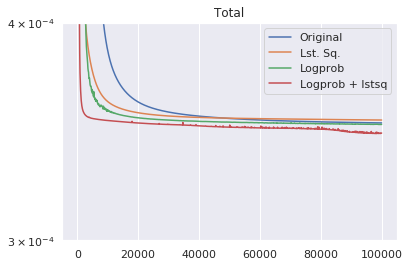

In [365]:
plt.semilogy(df_deepmod.index, df_deepmod['Regression_0'] + df_deepmod['MSE_0'], label='Original')
plt.semilogy(df_lstsq.index, df_lstsq['Regression_0'] + df_lstsq['MSE_0'], label='Lst. Sq.')
plt.semilogy(df_logprob.index, df_logprob['Regression_0'] + df_logprob['MSE_0'], label='Logprob')
plt.semilogy(df_lstsq_logprob.index, df_lstsq_logprob['Regression_0'] + df_lstsq_logprob['MSE_0'], label='Logprob + lstsq')

plt.legend()
plt.title('Total')
plt.ylim(3e-4, 4e-4)

# Error in coefficients

In [5]:
coeff_keys = [key for key in df_deepmod.keys() if key[:5]=='coeff']
scaled_coeff_keys = [key for key in df_deepmod.keys() if key[:6]=='scaled']

In [6]:
coeff_keys

['coeff_0_0',
 'coeff_0_1',
 'coeff_0_2',
 'coeff_0_3',
 'coeff_0_4',
 'coeff_0_5',
 'coeff_0_6',
 'coeff_0_7',
 'coeff_0_8',
 'coeff_0_9',
 'coeff_0_10',
 'coeff_0_11']

In [7]:
scaled_coeff_keys

['scaled_coeff_0_0',
 'scaled_coeff_0_1',
 'scaled_coeff_0_2',
 'scaled_coeff_0_3',
 'scaled_coeff_0_4',
 'scaled_coeff_0_5',
 'scaled_coeff_0_6',
 'scaled_coeff_0_7',
 'scaled_coeff_0_8',
 'scaled_coeff_0_9',
 'scaled_coeff_0_10',
 'scaled_coeff_0_11']

In [369]:
true_coeffs = np.zeros((1, 12))
true_coeffs[0, 2] = 0.1
true_coeffs[0, 5] = -1.0

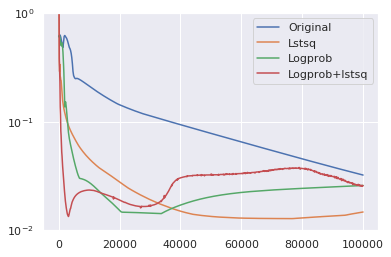

In [370]:
plt.semilogy(df_deepmod.index, np.mean(np.abs(df_deepmod[coeff_keys].to_numpy() - true_coeffs), axis=1), label='Original')
plt.semilogy(df_lstsq.index, np.mean(np.abs(df_lstsq[coeff_keys].to_numpy() - true_coeffs), axis=1), label='Lstsq')
plt.semilogy(df_deepmod.index, np.mean(np.abs(df_logprob[coeff_keys].to_numpy() - true_coeffs), axis=1), label='Logprob')
plt.semilogy(df_deepmod.index, np.mean(np.abs(df_lstsq_logprob[coeff_keys].to_numpy() - true_coeffs), axis=1), label='Logprob+lstsq')

plt.ylim([1e-2, 1])
plt.legend()

# Error in library

In [371]:
library_keys = [key for key in df_deepmod.keys() if key[:3] == 'mae']

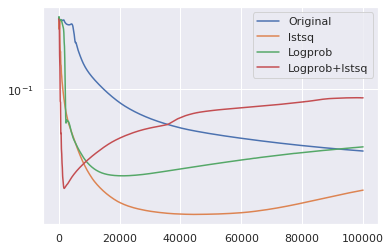

In [372]:
plt.semilogy(df_deepmod.index, np.mean(df_deepmod[library_keys].to_numpy(), axis=1), label='Original')
plt.semilogy(df_deepmod.index, np.mean(df_lstsq[library_keys].to_numpy(), axis=1), label='lstsq')
plt.semilogy(df_deepmod.index, np.mean(df_logprob[library_keys].to_numpy(), axis=1), label='Logprob')
plt.semilogy(df_deepmod.index, np.mean(df_lstsq_logprob[library_keys].to_numpy(), axis=1), label='Logprob+lstsq')

plt.legend()

In [373]:
df_deepmod.index[np.argmin(np.mean(df_lstsq[library_keys].to_numpy(), axis=1))]

43900

# Coefficients

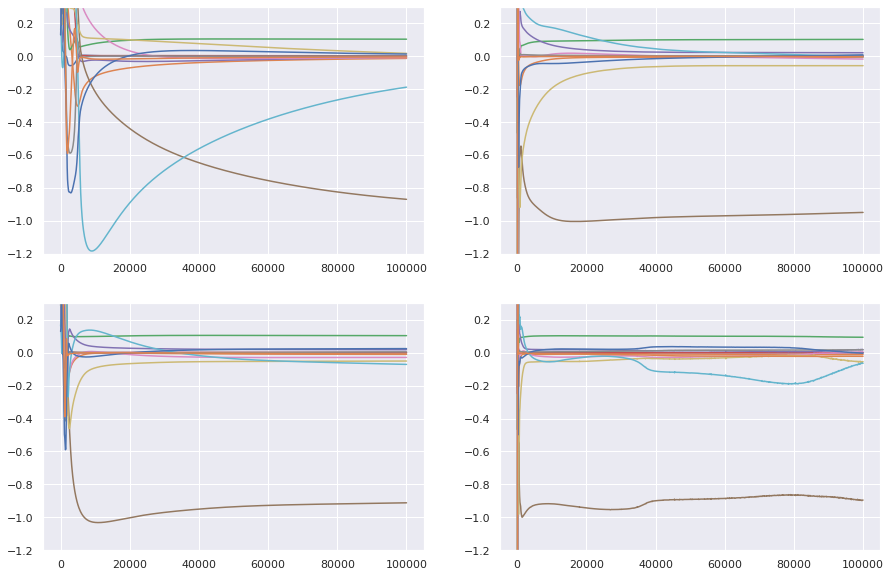

In [374]:
plt.figure(figsize=(15, 10))

plt.subplot(221)
plt.plot(df_deepmod.index, df_deepmod[coeff_keys].to_numpy(), label='Original')
plt.ylim([-1.2, 0.3])

plt.subplot(222)
plt.plot(df_lstsq.index, df_lstsq[coeff_keys].to_numpy(), label='Lstsq')
plt.ylim([-1.2, 0.3])


plt.subplot(223)
plt.plot(df_deepmod.index, df_logprob[coeff_keys].to_numpy(), label='Logprob')
plt.ylim([-1.2, 0.3])


plt.subplot(224)
plt.plot(df_deepmod.index, df_lstsq_logprob[coeff_keys].to_numpy(), label='Logprob+lstsq')
plt.ylim([-1.2, 0.3])


plt.show()

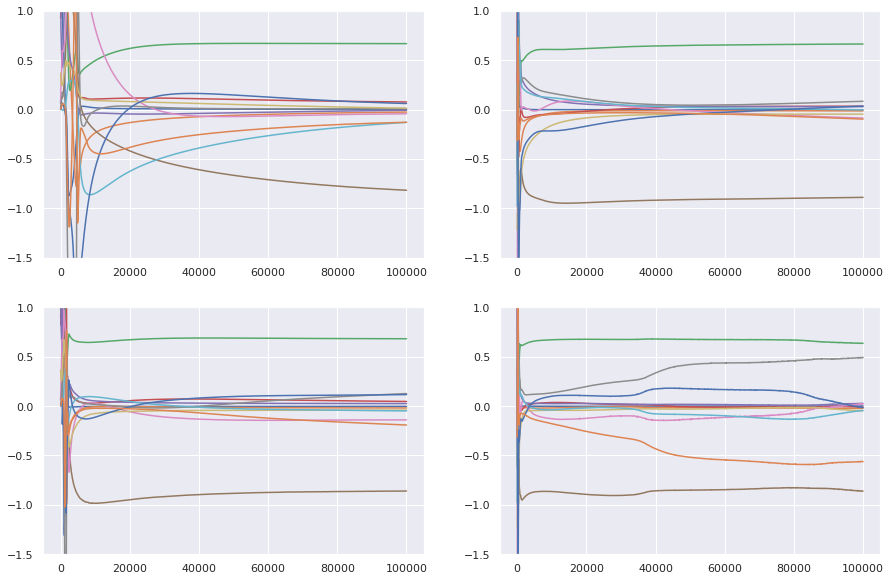

In [375]:
plt.figure(figsize=(15, 10))

plt.subplot(221)
plt.plot(df_deepmod.index, df_deepmod[scaled_coeff_keys].to_numpy(), label='Original')
plt.ylim([-1.5, 1.0])

plt.subplot(222)
plt.plot(df_lstsq.index, df_lstsq[scaled_coeff_keys].to_numpy(), label='Lstsq')
plt.ylim([-1.5, 1.0])


plt.subplot(223)
plt.plot(df_deepmod.index, df_logprob[scaled_coeff_keys].to_numpy(), label='Logprob')
plt.ylim([-1.5, 1.0])


plt.subplot(224)
plt.plot(df_lstsq_logprob.index, df_lstsq_logprob[scaled_coeff_keys].to_numpy(), label='Logprob+lstsq')
plt.ylim([-1.5, 1.0])


plt.show()

# Log prob

In [376]:
reg_min = df_lstsq_logprob.index[np.argmin(df_lstsq_logprob['Regression_0'][1:].to_numpy())]

In [377]:
reg_min

8500

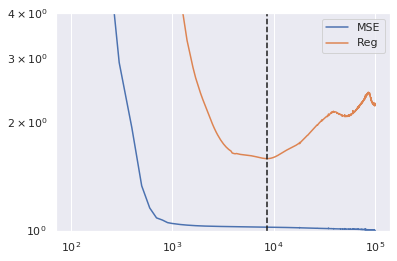

In [378]:
plt.semilogy(df_lstsq_logprob.index, df_lstsq_logprob['MSE_0']/df_lstsq_logprob['MSE_0'].min(), label='MSE')
plt.semilogy(df_lstsq_logprob.index, df_lstsq_logprob['Regression_0']/df_lstsq_logprob['Regression_0'].min(), label='Reg')

plt.ylim([1e0, 4e0])
plt.xscale('log')
plt.legend()

plt.axvline(reg_min, color='k', linestyle='--')

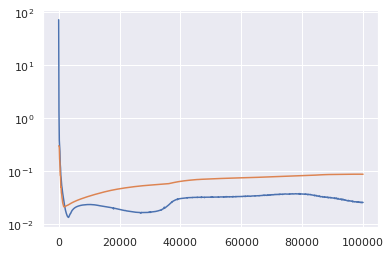

In [379]:
plt.semilogy(df_deepmod.index, np.mean(np.abs(df_lstsq_logprob[coeff_keys].to_numpy() - true_coeffs), axis=1), label='Logprob+lstsq')
plt.semilogy(df_deepmod.index, np.mean(df_lstsq_logprob[library_keys].to_numpy(), axis=1), label='Logprob+lstsq')

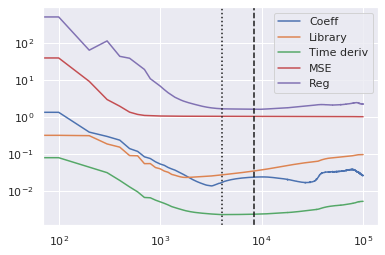

In [380]:
plt.semilogy(df_deepmod.index, np.mean(np.abs(df_lstsq_logprob[coeff_keys].to_numpy() - true_coeffs), axis=1), label='Coeff')
plt.semilogy(df_deepmod.index, np.mean(df_lstsq_logprob[library_keys[:-1]].to_numpy(), axis=1), label='Library')
plt.semilogy(df_deepmod.index, df_lstsq_logprob[library_keys[-1]].to_numpy(), label='Time deriv')


plt.semilogy(df_lstsq_logprob.index, df_lstsq_logprob['MSE_0']/df_lstsq_logprob['MSE_0'].min(), label='MSE')
plt.semilogy(df_lstsq_logprob.index, df_lstsq_logprob['Regression_0']/df_lstsq_logprob['Regression_0'].min(), label='Reg')


plt.xscale('log')
#plt.xlim([0, 10000])
plt.legend()

plt.axvline(reg_min, color='k', linestyle='--')
plt.axvline(df_deepmod.index[np.argmin(df_lstsq_logprob[library_keys[-1]].to_numpy())], color='k', linestyle=':')

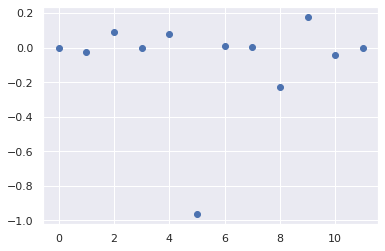

In [381]:
plt.plot(df_lstsq[coeff_keys].loc[reg_min].to_numpy(), 'o')

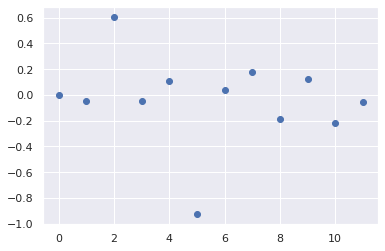

In [382]:
plt.plot(df_lstsq[scaled_coeff_keys].loc[reg_min].to_numpy(), 'o')

(0, 10000)

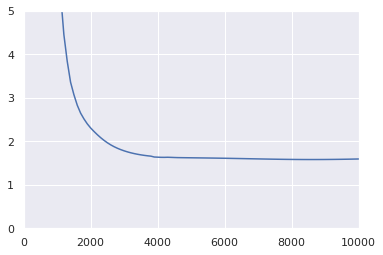

In [383]:
plt.plot(df_lstsq_logprob.index, df_lstsq_logprob['Regression_0']/df_lstsq_logprob['Regression_0'].min(), label='Reg')
plt.ylim([0, 5])
plt.xlim([0, 10000])

(0, 10000)

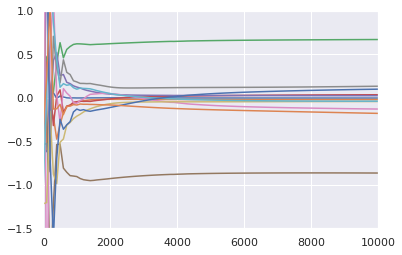

In [384]:
plt.plot(df_lstsq_logprob.index, df_lstsq_logprob[scaled_coeff_keys].to_numpy(), label='Logprob+lstsq')
plt.ylim([-1.5, 1.0])
plt.xlim([0, 10000])

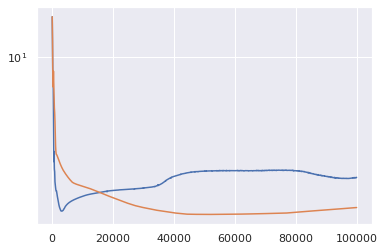

In [8]:
plt.semilogy(df_lstsq_logprob.index, np.sum(np.abs(df_lstsq_logprob[scaled_coeff_keys].to_numpy()), axis=1))
plt.semilogy(df_lstsq_logprob.index, np.sum(np.abs(df_lstsq[scaled_coeff_keys].to_numpy()), axis=1))

(0, 10000)

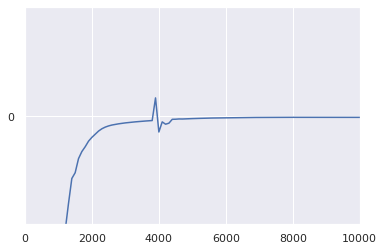

In [386]:
plt.plot(df_lstsq_logprob.index[1:], np.diff(df_lstsq_logprob['MSE_0']))
plt.yscale('symlog')
plt.ylim([-1e-6, 1e-6])
plt.xlim([0, 10000])

(0, 10000)

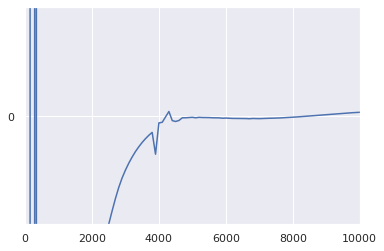

In [387]:
plt.plot(df_lstsq_logprob.index[1:], np.diff(df_lstsq_logprob['Regression_0']))
plt.yscale('symlog')
plt.ylim([-1e-7, 1e-7])
plt.xlim([0, 10000])

# Log prob 2nd order

In [9]:
df_lstsq_logprob_2nd = load_tensorboard('runs/deepmod_lstsq_logprob_short_2ndorder/')

In [10]:
reg_min = df_lstsq_logprob.index[np.argmin(df_lstsq_logprob_2nd['Regression_0'][1:].to_numpy())]

(0.0003, 0.0004)

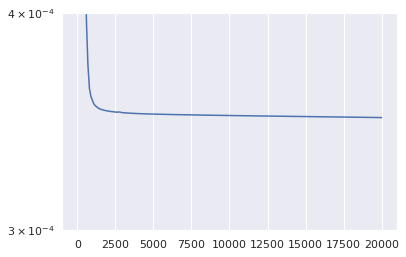

In [11]:
plt.semilogy(df_lstsq_logprob_2nd.index, df_lstsq_logprob_2nd['MSE_0'], label='MSE')

plt.ylim([3e-4, 4e-4])

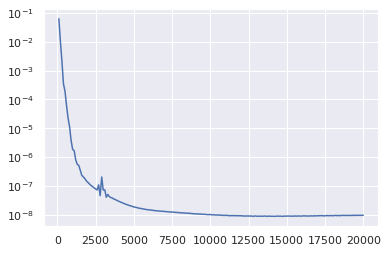

In [33]:
plt.plot(df_lstsq_logprob_2nd.index[1:], np.abs(np.diff(df_lstsq_logprob_2nd['MSE_0'])), label='MSE')
plt.yscale('log')


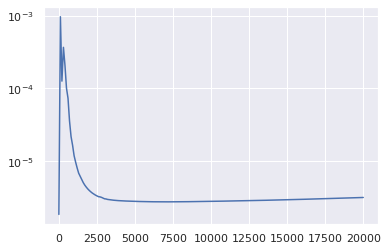

In [12]:
plt.semilogy(df_lstsq_logprob_2nd.index, df_lstsq_logprob_2nd['Regression_0'], label='Reg')

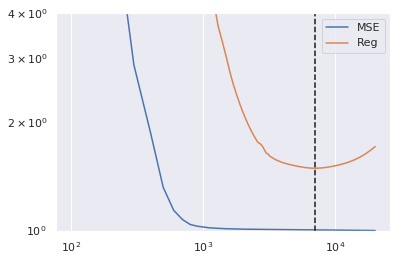

In [13]:
plt.semilogy(df_lstsq_logprob_2nd.index, df_lstsq_logprob_2nd['MSE_0']/df_lstsq_logprob_2nd['MSE_0'].min(), label='MSE')
plt.semilogy(df_lstsq_logprob_2nd.index, df_lstsq_logprob_2nd['Regression_0']/df_lstsq_logprob_2nd['Regression_0'].min(), label='Reg')

plt.ylim([1e0, 4e0])
plt.xscale('log')
plt.legend()

plt.axvline(reg_min, color='k', linestyle='--')

In [14]:
coeff_keys = [key for key in df_lstsq_logprob_2nd.keys() if key[:5]=='coeff']
scaled_coeff_keys = [key for key in df_lstsq_logprob_2nd.keys() if key[:6]=='scaled']
library_keys = [key for key in df_lstsq_logprob_2nd.keys() if key[:3] == 'mae']


true_coeffs = np.zeros((1, 9))
true_coeffs[0, 2] = 0.1
true_coeffs[0, 4] = -1.0

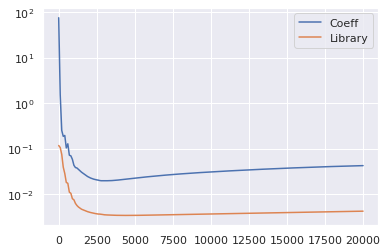

In [15]:
plt.semilogy(df_lstsq_logprob_2nd.index, np.mean(np.abs(df_lstsq_logprob_2nd[coeff_keys].to_numpy() - true_coeffs), axis=1), label='Coeff')
plt.semilogy(df_lstsq_logprob_2nd.index, np.mean(df_lstsq_logprob_2nd[library_keys].to_numpy(), axis=1), label='Library')

plt.legend()

Now let's compare where the minima are:

In [16]:
reg_min = df_lstsq_logprob.index[np.argmin(df_lstsq_logprob_2nd['Regression_0'][1:].to_numpy())]
lib_min = df_lstsq_logprob.index[np.argmin(np.mean(df_lstsq_logprob_2nd[library_keys].to_numpy(), axis=1)[1:])]
coeff_min = df_lstsq_logprob.index[np.argmin(np.mean(np.abs(df_lstsq_logprob_2nd[coeff_keys].to_numpy() - true_coeffs), axis=1)[1:])]

In [17]:
print(lib_min, reg_min, coeff_min)

4400 7000 3000


(0.9, 2)

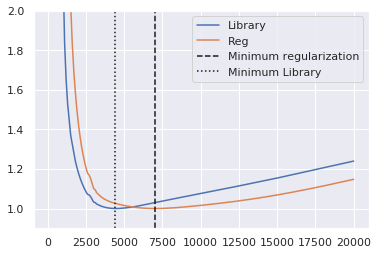

In [18]:
plt.plot(df_lstsq_logprob_2nd.index[1:], np.mean(df_lstsq_logprob_2nd[library_keys].to_numpy(), axis=1)[1:]/np.mean(df_lstsq_logprob_2nd[library_keys].to_numpy(), axis=1)[1:].min(), label='Library')
plt.plot(df_lstsq_logprob_2nd.index[1:], df_lstsq_logprob_2nd['Regression_0'][1:]/df_lstsq_logprob_2nd['Regression_0'][1:].min(), label='Reg')
#plt.plot(df_lstsq_logprob_2nd.index[1:], np.mean(np.abs(df_lstsq_logprob_2nd[coeff_keys].to_numpy() - true_coeffs), axis=1)[1:]/np.mean(np.abs(df_lstsq_logprob_2nd[coeff_keys].to_numpy() - true_coeffs), axis=1)[1:].min(), label='Coeff')


plt.axvline(reg_min, color='k', linestyle='--', label='Minimum regularization')
plt.axvline(lib_min, color='k', linestyle=':', label='Minimum Library')
#plt.axvline(coeff_min)

plt.legend()
plt.ylim([0.9, 2])

(0, 10000)

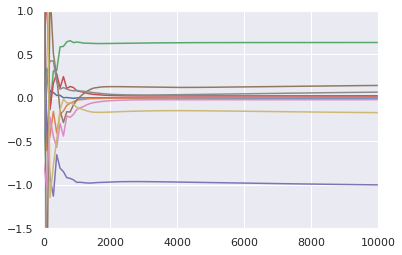

In [19]:
plt.plot(df_lstsq_logprob_2nd.index, df_lstsq_logprob_2nd[scaled_coeff_keys].to_numpy(), label='Logprob+lstsq')
plt.ylim([-1.5, 1.0])
plt.xlim([0, 10000])

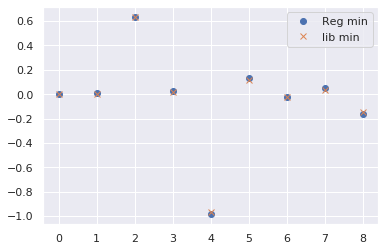

In [20]:
plt.plot(df_lstsq_logprob_2nd[scaled_coeff_keys].loc[reg_min].to_numpy(), 'o', label='Reg min')
plt.plot(df_lstsq_logprob_2nd[scaled_coeff_keys].loc[lib_min].to_numpy(), 'x', label='lib min')

plt.legend()

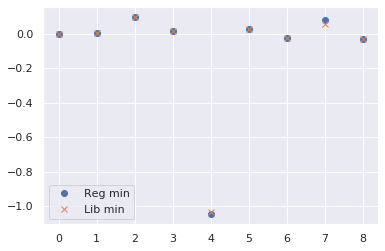

In [21]:
plt.plot(df_lstsq_logprob_2nd[coeff_keys].loc[reg_min].to_numpy(), 'o', label='Reg min')
plt.plot(df_lstsq_logprob_2nd[coeff_keys].loc[lib_min].to_numpy(), 'x', label='Lib min')

plt.legend()

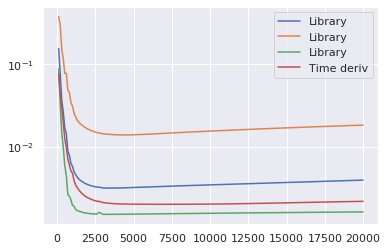

In [22]:
plt.semilogy(df_lstsq_logprob_2nd.index[1:], df_lstsq_logprob_2nd[library_keys[1:4]].to_numpy()[1:], label='Library')
plt.semilogy(df_lstsq_logprob_2nd.index[1:], df_lstsq_logprob_2nd[library_keys[-1]].to_numpy()[1:], label='Time deriv')

plt.legend()

In [23]:
np.argmin(df_lstsq_logprob_2nd[library_keys[1:4]].to_numpy()[1:], axis=0)

array([34, 43, 29])

In [24]:
np.argmin(df_lstsq_logprob_2nd[library_keys[-1]].to_numpy()[1:], axis=0)

67

(0.9, 3)

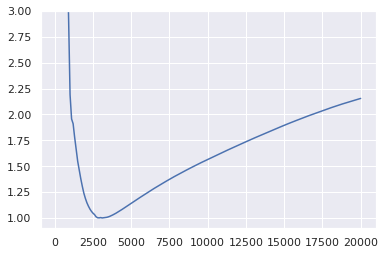

In [25]:
plt.plot(df_lstsq_logprob_2nd.index[1:], np.mean(np.abs(df_lstsq_logprob_2nd[coeff_keys].to_numpy() - true_coeffs), axis=1)[1:]/np.mean(np.abs(df_lstsq_logprob_2nd[coeff_keys].to_numpy() - true_coeffs), axis=1)[1:].min(), label='Coeff')
plt.ylim([0.9, 3])

(0, 0.1)

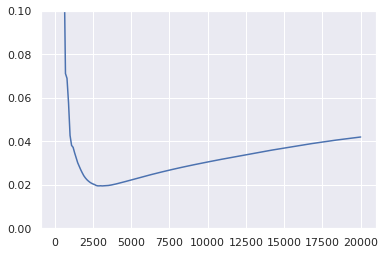

In [26]:
plt.plot(df_lstsq_logprob_2nd.index[1:], np.mean(np.abs(df_lstsq_logprob_2nd[coeff_keys].to_numpy() - true_coeffs), axis=1)[1:], label='Coeff')
plt.ylim([0, 0.1])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  after removing the cwd from sys.path.


(1.7619985728971206, 3)

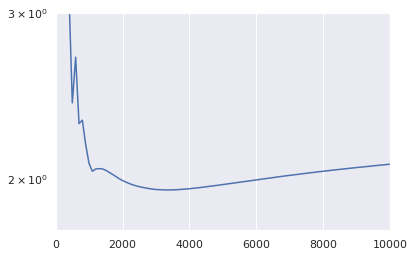

In [36]:
plt.semilogy(df_lstsq_logprob_2nd.index, np.sum(np.abs(df_lstsq_logprob_2nd[scaled_coeff_keys].to_numpy()), axis=1))
#plt.semilogy(df_lstsq_logprob.index, df_lstsq_logprob['MSE_0'])
plt.xlim([0, 10000])
plt.ylim([0, 3])

(0, 10000)

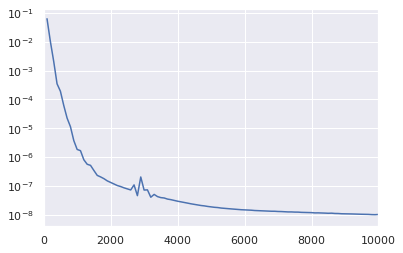

In [37]:
plt.plot(df_lstsq_logprob_2nd.index[1:], np.abs(np.diff(df_lstsq_logprob_2nd['MSE_0'])), label='MSE')
plt.yscale('log')
plt.xlim([0, 10000])

# Least squares vs log prob least squares

In [411]:
logprobmin = df_lstsq_logprob.index[np.argmin(np.sum(np.abs(df_lstsq_logprob[scaled_coeff_keys].to_numpy()), axis=1))]
lstmin = df_lstsq.index[np.argmin(np.sum(np.abs(df_lstsq[scaled_coeff_keys].to_numpy()), axis=1))]

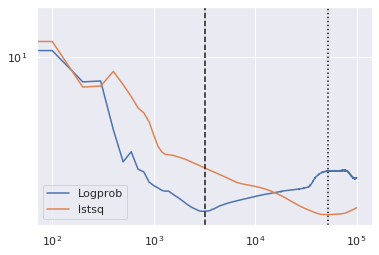

In [470]:
plt.semilogy(df_lstsq_logprob.index, np.sum(np.abs(df_lstsq_logprob[scaled_coeff_keys].to_numpy()), axis=1), label='Logprob')
plt.semilogy(df_lstsq.index, np.sum(np.abs(df_lstsq[scaled_coeff_keys].to_numpy()), axis=1), label='lstsq')

plt.axvline(logprobmin, color='k', linestyle='--')
plt.axvline(lstmin, color='k', linestyle=':')
plt.legend()
plt.xscale('log')

In [413]:
print(logprobmin, np.min(np.sum(np.abs(df_lstsq_logprob[scaled_coeff_keys].to_numpy()), axis=1)))
print(lstmin, np.min(np.sum(np.abs(df_lstsq[scaled_coeff_keys].to_numpy()), axis=1)))

3200 1.908831520122476
51900 1.8422310438472778


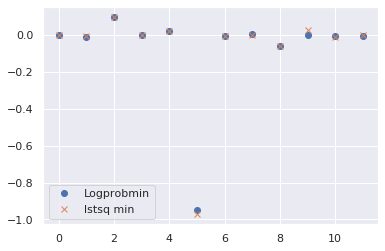

In [414]:
plt.plot(df_lstsq_logprob[coeff_keys].loc[logprobmin].to_numpy(), 'o', label='Logprobmin')
plt.plot(df_lstsq[coeff_keys].loc[lstmin].to_numpy(), 'x', label='lstsq min')

plt.legend()

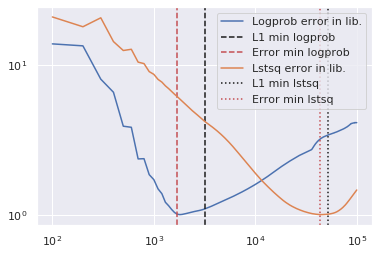

In [471]:
plt.plot(df_lstsq_logprob.index[1:], np.mean(df_lstsq_logprob[library_keys].to_numpy(), axis=1)[1:]/np.mean(df_lstsq_logprob[library_keys].to_numpy(), axis=1)[1:].min(), label='Logprob error in lib.')
plt.axvline(logprobmin, color='k', linestyle='--', label='L1 min logprob')
plt.axvline(df_lstsq_logprob.index[np.mean(df_lstsq_logprob[library_keys].to_numpy(), axis=1)[1:].argmin()], color='r', linestyle='--', label='Error min logprob')


plt.plot(df_lstsq.index[1:], np.mean(df_lstsq[library_keys].to_numpy(), axis=1)[1:]/np.mean(df_lstsq[library_keys].to_numpy(), axis=1)[1:].min(), label='Lstsq error in lib.')
plt.axvline(lstmin, color='k', linestyle=':', label='L1 min lstsq')
plt.axvline(df_lstsq.index[np.mean(df_lstsq[library_keys].to_numpy(), axis=1)[1:].argmin()], color='r', linestyle=':', label='Error min lstsq')

plt.xscale('log')
plt.yscale('log')
plt.legend()



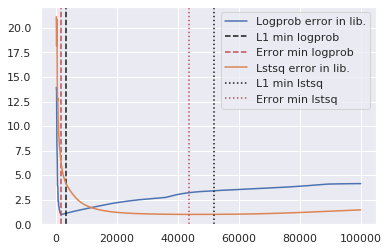

In [433]:
plt.plot(df_lstsq_logprob.index[1:], np.mean(df_lstsq_logprob[library_keys].to_numpy(), axis=1)[1:]/np.mean(df_lstsq_logprob[library_keys].to_numpy(), axis=1)[1:].min(), label='Logprob error in lib.')
plt.axvline(logprobmin, color='k', linestyle='--', label='L1 min logprob')
plt.axvline(df_lstsq_logprob.index[np.mean(df_lstsq_logprob[library_keys].to_numpy(), axis=1)[1:].argmin()], color='r', linestyle='--', label='Error min logprob')


plt.plot(df_lstsq.index[1:], np.mean(df_lstsq[library_keys].to_numpy(), axis=1)[1:]/np.mean(df_lstsq[library_keys].to_numpy(), axis=1)[1:].min(), label='Lstsq error in lib.')
plt.axvline(lstmin, color='k', linestyle=':', label='L1 min lstsq')
plt.axvline(df_lstsq.index[np.mean(df_lstsq[library_keys].to_numpy(), axis=1)[1:].argmin()], color='r', linestyle=':', label='Error min lstsq')

plt.legend()



(0, 5000)

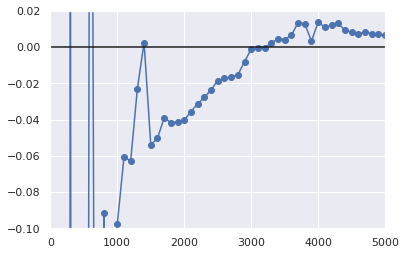

In [472]:
plt.plot(df_lstsq_logprob.index[1:], np.diff(np.sum(np.abs(df_lstsq_logprob[scaled_coeff_keys].to_numpy()), axis=1)), 'o-')
plt.ylim(-0.1, 0.02)
#plt.axvline(logprobmin, color='k', linestyle='--', label='L1 min logprob')
plt.axhline(0.0, color='k')

plt.xlim([0, 5000])

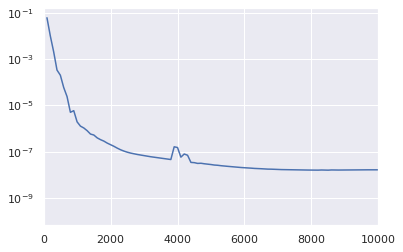

In [466]:
plt.plot(df_lstsq_logprob.index[1:], np.abs(np.diff(df_lstsq_logprob['MSE_0'])), label='MSE')
plt.xlim([0, 10000])
#plt.ylim([-1e-4, 1e-4])
plt.yscale('log')

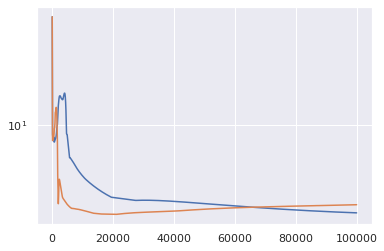

In [478]:
plt.semilogy(df_deepmod.index, np.sum(np.abs(df_deepmod[scaled_coeff_keys].to_numpy()), axis=1))
#plt.semilogy(df_lstsq.index, np.sum(np.abs(df_lstsq[scaled_coeff_keys].to_numpy()), axis=1))

plt.semilogy(df_logprob.index, np.sum(np.abs(df_logprob[scaled_coeff_keys].to_numpy()), axis=1))
#plt.semilogy(df_deepmod.index, np.sum(np.abs(df_deepmod[scaled_coeff_keys].to_numpy()), axis=1))

In [474]:
df_lstsq

,Total_loss,MSE_0,Regression_0,L1_0,coeff_0_0,coeff_0_1,coeff_0_2,coeff_0_3,coeff_0_4,coeff_0_5,...,mae_library_3,mae_library_4,mae_library_5,mae_library_6,mae_library_7,mae_library_8,mae_library_9,mae_library_10,mae_library_11,mae_time_deriv
0,0.075631,0.075629,0.000002,0.000002,0.002200,0.752449,-0.466082,-0.248039,-0.044689,10.816772,...,1.543671,0.185258,0.052000,0.146616,0.711723,0.056256,0.025494,0.098374,0.491303,0.064127
100,0.016409,0.015793,0.000616,0.000616,-0.040383,-0.270685,0.478722,0.046652,0.588689,-0.862347,...,1.587449,0.091515,0.049722,0.148489,0.717251,0.042296,0.024843,0.098266,0.491927,0.078981
200,0.005946,0.005784,0.000162,0.000162,-0.010275,-0.354001,0.020938,0.067643,0.213046,0.648102,...,1.435878,0.045205,0.031559,0.119149,0.676293,0.021161,0.018544,0.086287,0.476149,0.049968
300,0.003239,0.003135,0.000104,0.000104,0.011970,-0.028584,-0.002589,0.000197,-0.084554,-1.491028,...,1.695745,0.041025,0.030406,0.137716,0.817788,0.016578,0.018147,0.095160,0.546423,0.042778
400,0.001663,0.001525,0.000137,0.000137,0.013050,-0.026192,-0.004045,-0.013677,0.104775,-1.399727,...,1.160389,0.019670,0.020093,0.089724,0.577145,0.011336,0.013291,0.068765,0.417186,0.035179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99600,0.000352,0.000351,0.000001,0.000001,-0.000547,-0.007539,0.101481,0.000789,0.020506,-0.949097,...,0.123713,0.001462,0.000926,0.005462,0.061629,0.000662,0.000523,0.003882,0.049187,0.001952
99700,0.000352,0.000351,0.000001,0.000001,-0.000548,-0.007537,0.101485,0.000790,0.020507,-0.949039,...,0.123814,0.001462,0.000927,0.005466,0.061696,0.000662,0.000523,0.003885,0.049243,0.001952
99800,0.000352,0.000351,0.000001,0.000001,-0.000548,-0.007532,0.101486,0.000789,0.020503,-0.949028,...,0.123914,0.001462,0.000927,0.005470,0.061764,0.000662,0.000523,0.003889,0.049298,0.001953
99900,0.000352,0.000351,0.000001,0.000001,-0.000547,-0.007552,0.101487,0.000790,0.020512,-0.948948,...,0.124015,0.001463,0.000927,0.005474,0.061831,0.000662,0.000524,0.003892,0.049353,0.001953
